# Exploración de los datos
## Proyecto de Aprendizaje Automático
#### Pablo Berástegui Magallón (202311460)
#### Ingeniería Matemática e Inteligencia Artificial
#### Universidad Pontificia Comillas

____________________________
### Importación de las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.utils import optimal_bins, categories_map, variable_name_map

____________________________
### Inicialización del dataset

In [2]:
df = pd.read_csv('../data/rendimiento_estudiantes_train.csv', sep=',')
df

,escuela,sexo,edad,entorno,TamFam,EstPadres,Medu,Pedu,Mtrab,Ptrab,...,TiempoLib,SalAm,AlcSem,AlcFin,salud,faltas,asignatura,T1,T2,T3
0,IC,M,19,U,>=4,J,2.0,1.0,casa,otros,...,4,3,1.0,3,5,210.910377,L,8,9,9
1,BG,F,18,U,>=4,J,4.0,4.0,sanidad,sanidad,...,4,4,1.0,1,4,15.000000,M,9,8,8
2,BG,F,16,R,>=4,J,4.0,4.0,sanidad,docencia,...,4,4,2.0,3,4,0.000000,L,17,16,16
3,BG,F,16,U,<4,J,4.0,3.0,docencia,servicios,...,4,3,1.0,2,1,2.000000,L,16,15,16
4,BG,M,18,U,<4,J,3.0,3.0,servicios,sanidad,...,2,4,2.0,4,4,13.000000,M,6,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,IC,F,19,U,>=4,J,2.0,NaN,casa,servicios,...,4,4,1.0,1,2,0.000000,L,9,9,10
831,IC,F,18,U,<4,J,1.0,1.0,casa,servicios,...,3,2,1.0,1,4,0.000000,L,19,17,18
832,IC,F,15,R,>=4,J,3.0,3.0,servicios,otros,...,5,4,NaN,1,1,4.000000,L,13,12,12
833,BG,F,17,U,>=4,J,NaN,NaN,servicios,otros,...,3,5,2.0,4,4,4.000000,L,12,16,16


____________________________
### Exploración inicial

In [3]:
n = df.shape[0]
print(f'Número de muestras (n): {n}')

p = df.shape[1] - 1
print(f'Número de variables (p): {p}')

null_lines = df[df.isna().any(axis=1)].shape[0]
print('Muestras con algún dato NaN: ', null_lines)

Número de muestras (n): 835
Número de variables (p): 33
Muestras con algún dato NaN:  186


In [4]:
for col in df.columns:
    if df[col].isna().any():
        print(f'Variable {col} tiene {df[col].isna().sum()} valores NaN')
        print(f'Porcentaje de NaN: {df[col].isna().sum() / n * 100:.2f}%')
        print('-----------------------------------')

Variable Medu tiene 52 valores NaN
Porcentaje de NaN: 6.23%
-----------------------------------
Variable Pedu tiene 104 valores NaN
Porcentaje de NaN: 12.46%
-----------------------------------
Variable TiempoEstudio tiene 16 valores NaN
Porcentaje de NaN: 1.92%
-----------------------------------
Variable RelFam tiene 17 valores NaN
Porcentaje de NaN: 2.04%
-----------------------------------
Variable AlcSem tiene 20 valores NaN
Porcentaje de NaN: 2.40%
-----------------------------------


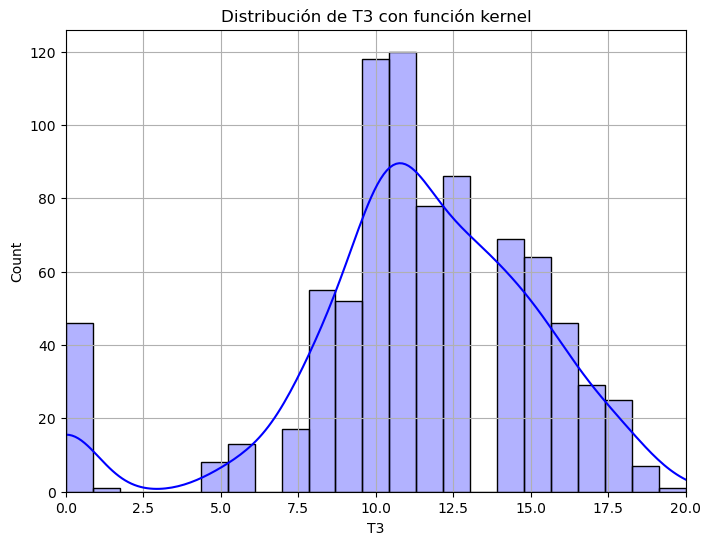

In [5]:
plt.figure(figsize=(8, 6))
plt.title("Distribución de T3 con función kernel")
plt.xlabel("T3")
sns.histplot(df['T3'].dropna(), kde=True, color="blue", alpha=0.3, bins=optimal_bins(df['T3'].dropna()))
plt.grid(True)
plt.xlim(0, 20)
plt.show()

In [6]:
df[df['T3'] == 0]

,escuela,sexo,edad,entorno,TamFam,EstPadres,Medu,Pedu,Mtrab,Ptrab,...,TiempoLib,SalAm,AlcSem,AlcFin,salud,faltas,asignatura,T1,T2,T3
18,BG,F,18,U,<4,J,2.0,2.0,otros,otros,...,3,3,1.0,1,2,0.0,M,8,8,0
81,BG,F,15,U,>=4,J,3.0,2.0,sanidad,servicios,...,3,2,1.0,1,3,0.0,M,6,7,0
84,IC,F,18,U,>=4,J,1.0,1.0,otros,otros,...,1,1,1.0,1,5,0.0,M,6,5,0
94,BG,F,16,U,>=4,J,2.0,2.0,otros,otros,...,1,5,1.0,1,4,0.0,M,6,7,0
95,BG,M,16,U,<4,J,1.0,2.0,otros,otros,...,4,4,2.0,4,5,0.0,M,7,0,0
111,BG,M,19,U,>=4,J,3.0,2.0,servicios,casa,...,5,4,1.0,1,4,0.0,M,5,0,0
112,BG,F,17,U,>=4,S,2.0,2.0,casa,casa,...,3,1,1.0,2,4,0.0,M,9,8,0
129,BG,F,18,U,>=4,J,3.0,3.0,servicios,servicios,...,3,4,1.0,1,4,0.0,M,7,0,0
134,IC,M,18,R,>=4,J,3.0,NaN,servicios,otros,...,3,1,2.0,2,5,0.0,L,4,0,0
140,BG,M,16,U,<4,J,4.0,3.0,docencia,otros,...,4,5,1.0,1,3,0.0,M,6,0,0


Las personas con 0 en la nota final acumulan una proporción importante de los suspensos del centro.

In [7]:
df[(df['T3'] == 0)].value_counts('suspensos')

suspensos
0    22
1    13
2     6
3     5
Name: count, dtype: int64

In [8]:
df['suspensos'].value_counts()

suspensos
0    680
1     99
2     30
3     26
Name: count, dtype: int64

Si eliminásemos todas las filas con algún valor nulo estaríamos perdiendo más de un 20% de los datos, lo cual no nos lo podemos permitir.

In [9]:
# Variables numéricas
num_vars = df.select_dtypes(include=['number']).columns

# Variables categóricas
cat_vars = df.select_dtypes(include=['object', 'category']).columns

print(f"Columnas numéricas ({len(num_vars) - 1}):", list(num_vars))
print(f"Columnas categóricas ({len(cat_vars)}):", list(cat_vars))

Columnas numéricas (15): ['edad', 'Medu', 'Pedu', 'TiempoViaje', 'TiempoEstudio', 'suspensos', 'RelFam', 'TiempoLib', 'SalAm', 'AlcSem', 'AlcFin', 'salud', 'faltas', 'T1', 'T2', 'T3']
Columnas categóricas (18): ['escuela', 'sexo', 'entorno', 'TamFam', 'EstPadres', 'Mtrab', 'Ptrab', 'razon', 'tutor', 'apoyo', 'ApFam', 'academia', 'extras', 'enfermeria', 'EstSup', 'internet', 'pareja', 'asignatura']


**Nota**: se considera que hay 15 y no 16 variables numéricas porque **T3 es nuestra variable objetivo**. Sin embargo la mantenemos por el momento para estudiar cómo se distribuye ésta y el resto antes de comenzar el entrenamiento de los modelos.

#### Valores más típicos de cada variable

> Los usamos para imputar datos faltantes

In [10]:
for col in df.columns:
    if col in cat_vars:
        print(col, df[col].mode()[0])
        df[col] = df[col].fillna(df[col].mode()[0])
    elif col in num_vars:
        print(col, df[col].median())
        df[col] = df[col].fillna(df[col].median())

null_lines = df[df.isna().any(axis=1)].shape[0]
print('Muestras con algún dato NaN: ', null_lines)

escuela BG
sexo F
edad 17.0
entorno U
TamFam >=4
EstPadres J
Medu 3.0
Pedu 2.0
Mtrab otros
Ptrab otros
razon optativas
tutor madre
TiempoViaje 1.0
TiempoEstudio 2.0
suspensos 0.0
apoyo no
ApFam si
academia no
extras si
enfermeria si
EstSup si
internet si
pareja no
RelFam 4.0
TiempoLib 3.0
SalAm 3.0
AlcSem 1.0
AlcFin 2.0
salud 4.0
faltas 2.0
asignatura L
T1 11.0
T2 11.0
T3 11.0
Muestras con algún dato NaN:  0


Varias personas evaluadas en **M**atemáticas y **L**engua:

In [11]:
# Definimos un dataframe que no tiene en cuenta la asignatura en ningún aspecto
df_general = df.drop(columns=['asignatura', 'T1', 'T2', 'T3'])
df_general.value_counts().sort_values().value_counts()  # 15 personas tienen nota de matemáticas y lengua

count
1    809
2     13
Name: count, dtype: int64

#### Veamos los valores que toman las variables:

In [12]:
for col in df.columns:
    print(col, list(df[col].unique()))

escuela ['IC', 'BG']
sexo ['M', 'F']
edad [19, 18, 16, 15, 17, 20, 22, 21]
entorno ['U', 'R']
TamFam ['>=4', '<4']
EstPadres ['J', 'S']
Medu [2.0, 4.0, 3.0, 1.0, 0.0]
Pedu [1.0, 4.0, 3.0, 2.0, 0.0]
Mtrab ['casa', 'sanidad', 'docencia', 'servicios', 'otros']
Ptrab ['otros', 'sanidad', 'docencia', 'servicios', 'casa']
razon ['optativas', 'reputacion', 'otras', 'cercania', 'otros']
tutor ['otros', 'padre', 'madre']
TiempoViaje [2, 1, 3, 4]
TiempoEstudio [1.0, 2.0, 3.0, 4.0]
suspensos [3, 1, 0, 2]
apoyo ['no', 'si']
ApFam ['no', 'si']
academia ['no', 'si']
extras ['si', 'no']
enfermeria ['no', 'si']
EstSup ['no', 'si']
internet ['si', 'no']
pareja ['si', 'no']
RelFam [4.0, 2.0, 5.0, 3.0, 1.0]
TiempoLib [4, 2, 3, 1, 5]
SalAm [3, 4, 2, 5, 1]
AlcSem [1.0, 2.0, 3.0, 5.0, 4.0]
AlcFin [3, 1, 2, 4, 5]
salud [5, 4, 1, 2, 3]
faltas [210.91037672760865, 15.0, 0.0, 2.0, 13.0, 10.0, 11.0, 4.0, 6.0, 20.0, 30.0, 8.0, 14.0, 3.0, 243.70358866525925, 9.0, 18.0, 1.0, 16.0, 5.0, 233.6382307206233, 246.036982

Analizando las variables, observamos que en la variable `razon` podemos unificar los valores 'otras' y 'otros', ya que tienen el mismo sentido.

In [13]:
df['razon'].unique()

array(['optativas', 'reputacion', 'otras', 'cercania', 'otros'],
      dtype=object)

In [14]:
df['razon'] = df['razon'].apply(lambda x: 'otros' if x == 'otras' else x)
df['razon'].unique()

array(['optativas', 'reputacion', 'otros', 'cercania'], dtype=object)

____________________________
### Análisis básico

**Ajuste de outliers/errores de imputación**: en la variable *faltas*, vemos que hay valores float que no concuerdan con la lógica de la variable. Además, dichos valores coinciden con aquellos mayores que 100. Esto se debe a un error en la imputación de los datos.

In [15]:
outliers = df['faltas'][df['faltas'] > 200]
float_values = df['faltas'][df['faltas'] % 1 != 0]

print(list(outliers) == list(float_values))
print(outliers.shape[0], 'outliers en faltas (mayores a 100)')
outliers

True
20 outliers en faltas (mayores a 100)


0      210.910377
32     243.703589
79     233.638231
98     246.036983
104    202.002956
178    204.688826
215    212.483448
227    237.513288
259    213.162367
296    243.533452
328    211.025213
343    222.916180
350    239.629741
372    239.796319
530    224.306524
554    207.602428
586    200.032670
654    208.756157
694    231.366447
790    217.560969
Name: faltas, dtype: float64

Por el momento decidimos eliminar dichos valores por comodidad.

In [16]:
df['faltas'] = df['faltas'].drop(outliers.index)
df['faltas'] = df['faltas'].fillna(0).astype(int)

En nuestro dataset hay tres bloques importantes de correlación:
- `T1`, `T2` y `T3`
- `Pedu`, `Medu`
- `AlcSem`, `AlcFin`

Vamos a simplificar los dos últimos bloques mencionados para reducir la dimensión.

Consideremos que el nivel "promedio" de educación de los padres es el que influye al niño en sus resultados académicos.

In [17]:
PMEdu = (df["Medu"] + df["Pedu"]) / 2
df.insert(df.columns.get_loc("Pedu") + 1, "PMedu", PMEdu)
df.drop(columns=['Pedu', 'Medu'], inplace=True)

Por otro lado, consideramos que es más influyente la cantidad de alcohol consumida entre semana que en fines de semana, por eso hacemos dicha ponderación.

In [18]:
Alc = df['AlcSem'] * 0.7 + df['AlcFin'] * 0.3
Alc = Alc.round(0).astype(int)
df.insert(df.columns.get_loc("AlcSem") + 1, "Alc", Alc)
df.drop(columns=['AlcSem', 'AlcFin'], inplace=True)

In [19]:
df.to_csv('../data/rendimiento_estudiantes_train_clean.csv')

____________________________
### Visualización de las variables

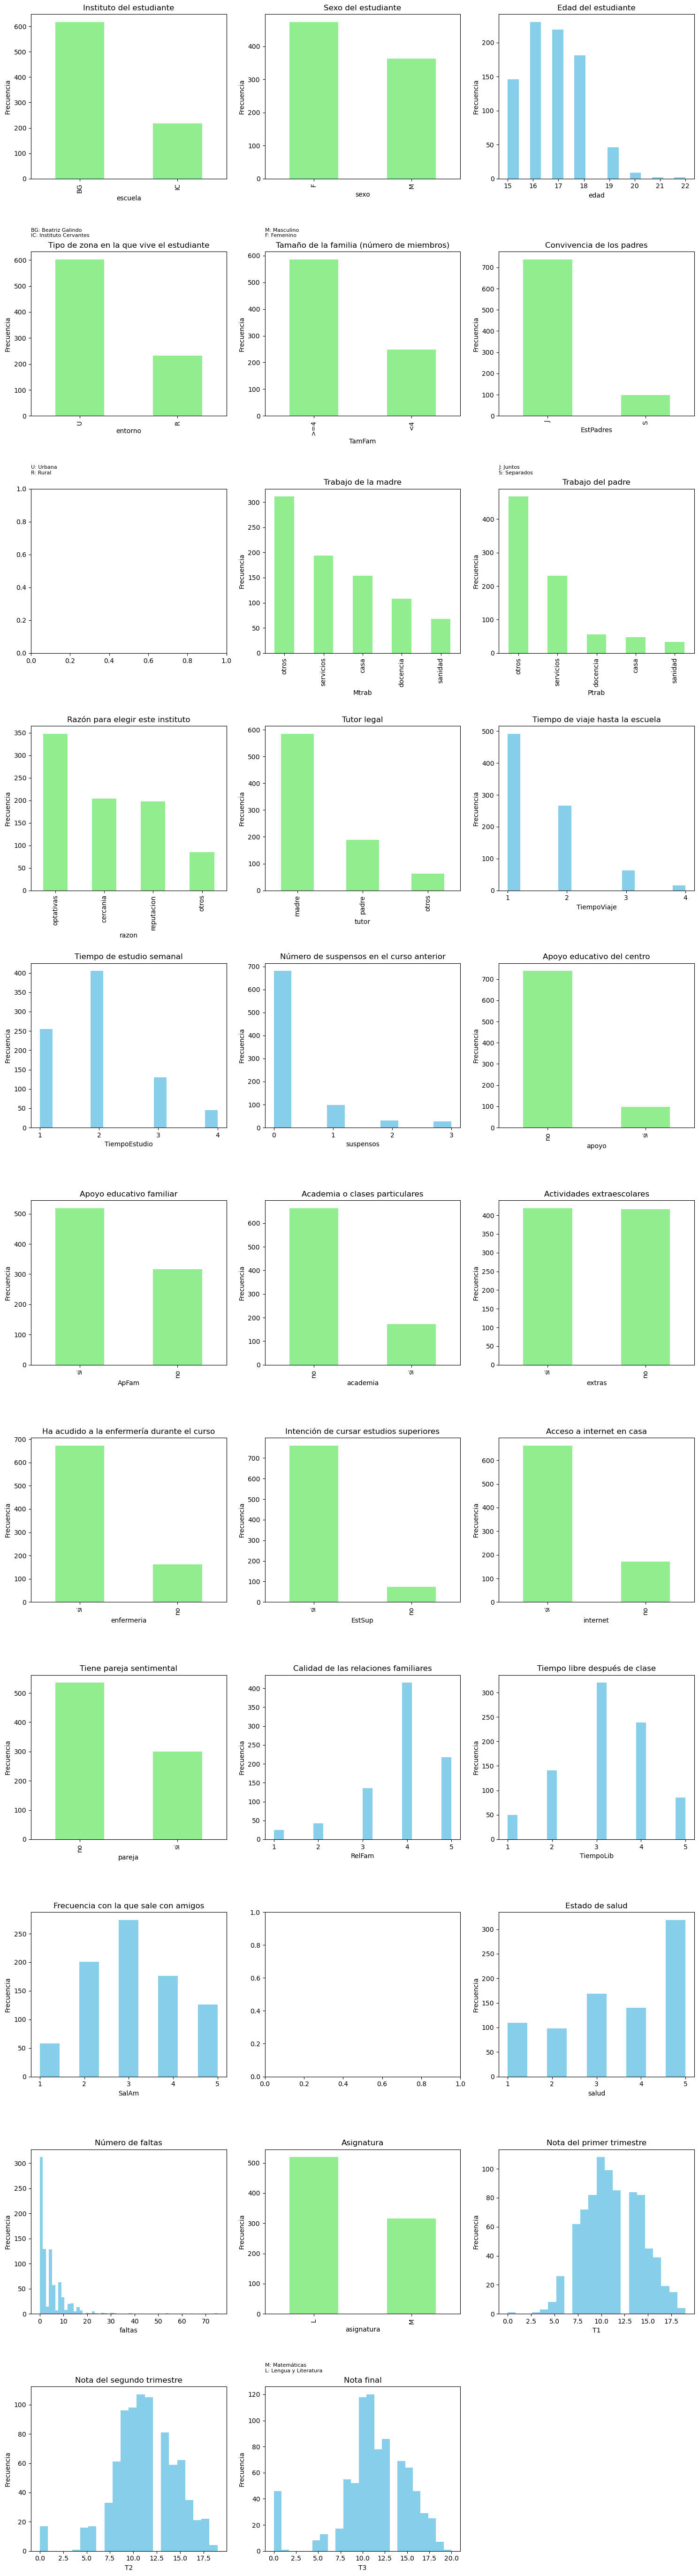

In [20]:
# Configuración de subplots
num_cols = 3  # Número de columnas en los subplots
num_rows = math.ceil(len(df.columns) / num_cols)  # Filas necesarias

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Aplanar para iterar fácilmente

for i, var in enumerate(df.columns):
    ax = axes[i]
    
    if var in num_vars:

        if df[var].nunique() < 6:   # Numéricas tratadas como categóricas
            unique_values = sorted(df[var].dropna().unique())
            ax.set_xticks(unique_values)
            ax.set_xticklabels([str(int(val)) for val in unique_values])
            

        data = df[var].dropna()
        ax.hist(data, bins=optimal_bins(data), color='skyblue')
        ax.set_title(variable_name_map[var])
        ax.set_xlabel(var)
        ax.set_ylabel('Frecuencia')
    
    elif var in cat_vars:
        data = df[var].dropna()
        data.value_counts().plot(kind='bar', color='lightgreen', ax=ax)
        ax.set_title(variable_name_map[var])
        ax.set_xlabel(var)
        ax.set_ylabel('Frecuencia')
        
        # Agregar leyendas de categorías (si existen)
        mapeos = categories_map.get(var, None)
        if mapeos:
            leyendas = "\n".join([f"{k}: {v}" for k, v in mapeos.items()])
            ax.text(0, -0.3, leyendas, transform=ax.transAxes, fontsize=8, va='top', wrap=True)

# Desactivar los subplots vacíos
for j in range(len(df.columns), len(axes)):
    axes[j].axis('off')

# Ajustar diseño
plt.tight_layout()
plt.show()

### Distribución de T1, T2 y T3

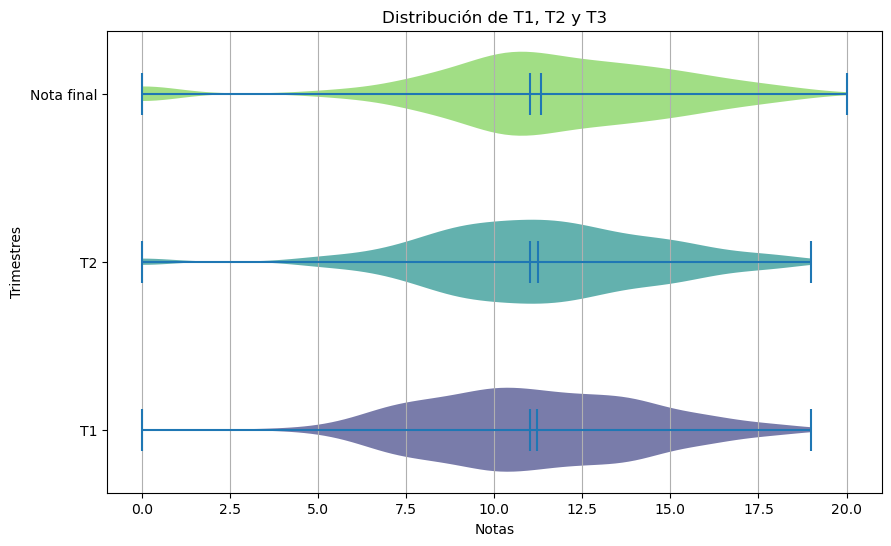

In [21]:

fig = plt.figure(figsize=(10, 6))
cmap = plt.colormaps.get_cmap('viridis')
colors = [cmap(0.2), cmap(0.5), cmap(0.8)]
parts = plt.violinplot([df[f'T{i}'].dropna() for i in range(1, 4)], vert=False, showmeans=True, showmedians=True)

for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_alpha(0.7)
plt.yticks([1, 2, 3], ['T1', 'T2', 'Nota final'])
plt.title('Distribución de T1, T2 y T3')
plt.xlabel('Notas')
plt.ylabel('Trimestres')
plt.grid(axis='x')

plt.show()

***
### Relación de las variables con el target

In [22]:
df.columns

Index(['escuela', 'sexo', 'edad', 'entorno', 'TamFam', 'EstPadres', 'PMedu',
       'Mtrab', 'Ptrab', 'razon', 'tutor', 'TiempoViaje', 'TiempoEstudio',
       'suspensos', 'apoyo', 'ApFam', 'academia', 'extras', 'enfermeria',
       'EstSup', 'internet', 'pareja', 'RelFam', 'TiempoLib', 'SalAm', 'Alc',
       'salud', 'faltas', 'asignatura', 'T1', 'T2', 'T3'],
      dtype='object')

> En este caso definimos unas variables _"pseudo-categóricas"_ y _"pseudo-numéricas"_ para visualizarlas mejor

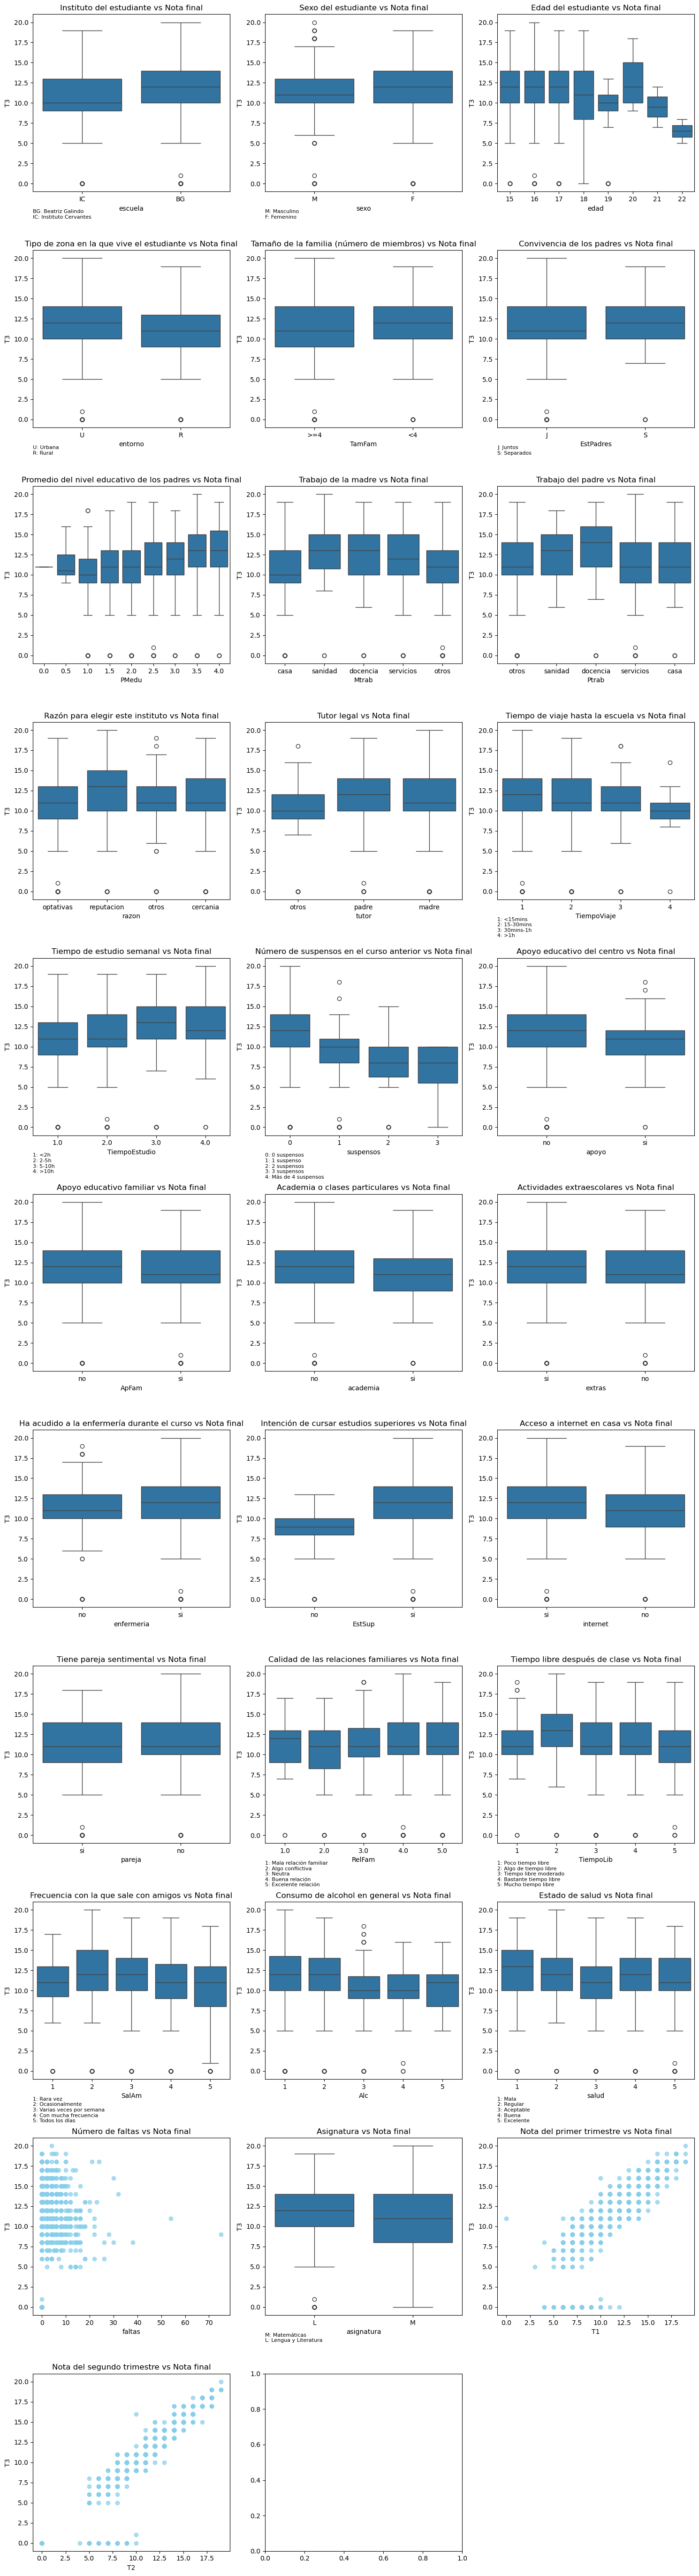

In [23]:
# Configuración de subplots
num_cols = 3  # Número de columnas en los subplots
num_rows = math.ceil(len(df.columns) / num_cols) # Filas necesarias sin T3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Aplanar para iterar fácilmente
pseudo_cat = df.columns.drop(labels=['faltas', 'T1', 'T2', 'T3'])
pseudo_num = ['faltas', 'T1', 'T2']
for i, var in enumerate(df.columns[:-1]):
    ax = axes[i]
    if var in pseudo_num:
        
        ax.scatter(df[var], df['T3'], alpha=0.7, color='skyblue')
        ax.set_title(f'{variable_name_map[var]} vs Nota final')
        ax.set_xlabel(var)
        ax.set_ylabel('T3')

    
    elif var in pseudo_cat:
        
        sns.boxplot(x=var, y='T3', data=df, ax=ax)
        ax.set_title(f'{variable_name_map[var]} vs Nota final')
        ax.set_xlabel(var)
        ax.set_ylabel('T3')

        # Agregar leyendas de categorías (si existen)
        mapeos = categories_map.get(var, None)
        if mapeos:
            leyendas = "\n".join([f"{k}: {v}" for k, v in mapeos.items()])
            ax.text(0, -0.1, leyendas, transform=ax.transAxes, fontsize=8, va='top', wrap=True)

# Desactivar los subplots vacíos
for j in range(len(df.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Matriz de correlaciones

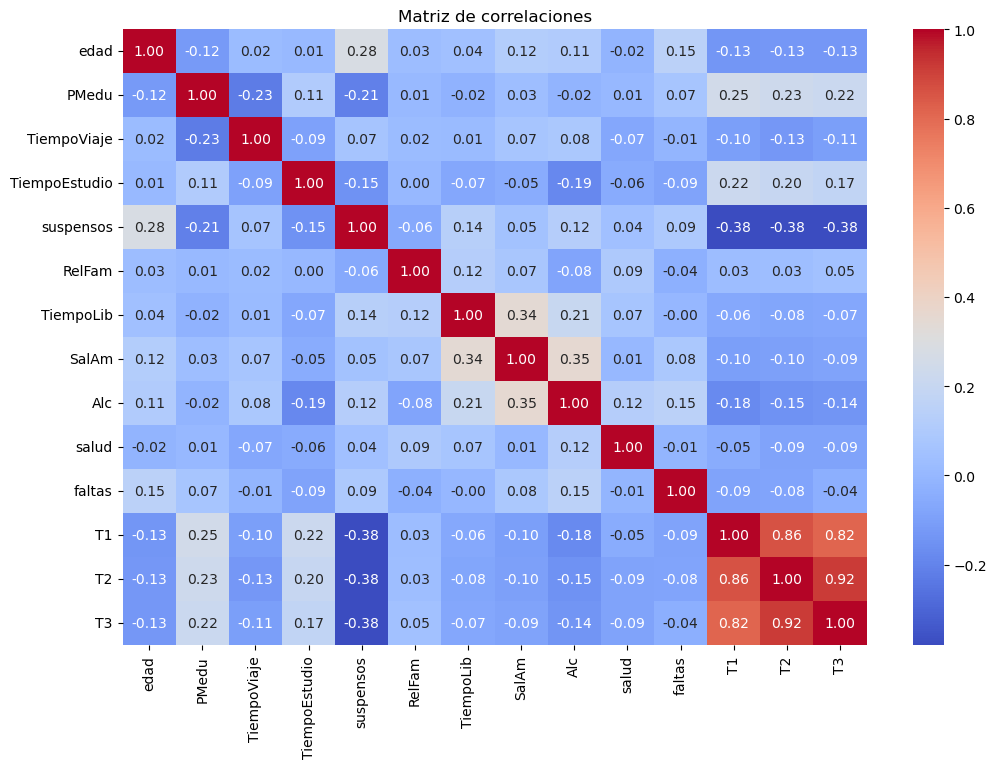

In [24]:
# Calcular la matriz de correlaciones
correlation_matrix = df.drop(columns=cat_vars).corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de correlaciones")
plt.show()